# Interpretación de métricas de clasificación binaria

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook explica la interpretación de las métricas disponibles en un problema de clasificación binaria.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy 2.0.2
- pandas 2.2.2
- matplotlib 3.10.0
- sklearn 1.6.1

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

               predicho
              No    Sí
      No     39     3
      Sí      8    10

              precision    recall  f1-score   support
       No         0.83       0.93      0.88        42
       Sí         0.77       0.56      0.65        18


**¿Cómo interpretar estos resultados?**

**Precision ("Sí") = 0.77**

+ De todos los casos que el modelo predijo como "Sí", el 77% realmente eran "Sí".

+ Ayuda a saber: *¿Qué tan confiable es un “sí” del modelo?*


**Recall ("Sí") = 0.56**

+ De todos los verdaderos "Sí", solo el 56% fueron detectados.

+ Ayuda a saber: *¿Qué tan sensible es el modelo para captar los positivos reales?*

**F1-score ("Sí") = 0.65**

+ Es el promedio armónico entre precision y recall. Balancea ambos.

+ Un F1-score de 0.65 indica que el modelo no detecta todos los casos positivos (recall no es alto) y que algunos de los que predice como “sí” están mal clasificados (precision no es perfecta).

+ Es posible que esté dejando pasar algunos positivos reales (falsos negativos) o que cometa falsos positivos (predice adopción donde no la hay).

🔍 Ayuda a saber: *¿Qué tan bueno es el modelo considerando precisión y cobertura?*

**¿Cuándo usar cada métrica?**

+ Usar `precision` cuando los falsos positivos sean costosos (ej. diagnóstico falso de cáncer).

+ Usar `recall` cuando los falsos negativos sean costosos (ej. dejar pasar un fraude).

+ Usar `F1-score` cuando se quiera equilibrio y las clases estén algo desbalanceadas.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Generar dataset binario desbalanceado (70% clase 0, 30% clase 1)
X, y = make_classification(
    n_samples=200,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    weights=[0.7, 0.3],
    random_state=29
)

# Análisis distribución variable objetivo

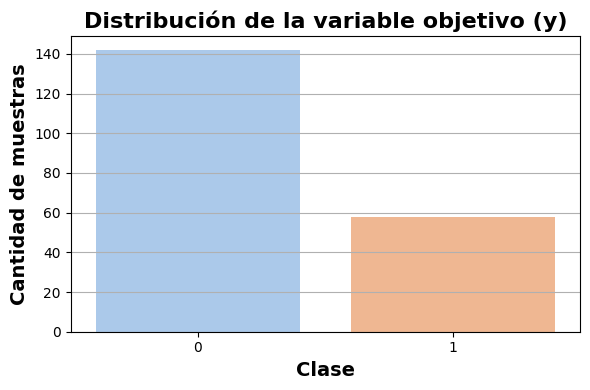

In [ ]:
# Crear un DataFrame para graficar
data_y = pd.DataFrame(y, columns=["Clase"])

# Contar ocurrencias y graficar
plt.figure(figsize=(6, 4))
sns.countplot(data=data_y, x="Clase", hue = "Clase", palette="pastel", legend=False)
plt.title("Distribución de la variable objetivo (y)", fontsize=16, fontweight="bold")
plt.xlabel("Clase", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de muestras", fontsize=14, fontweight="bold")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


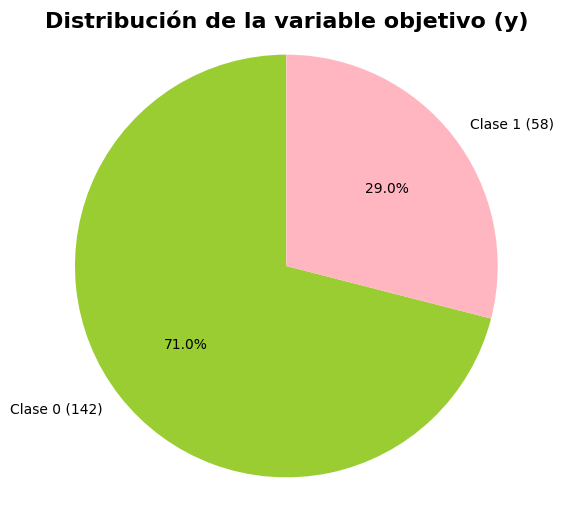

In [ ]:
# Calcular proporciones por clase
clases, counts = np.unique(y, return_counts=True)
labels = [f"Clase {clases[i]} ({counts[i]})" for i in range(len(clases))]
colors = ["#9ACD32", "#FFB6C1"]

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Distribución de la variable objetivo (y)", fontsize=16, fontweight="bold")
plt.axis("equal")
plt.show()

In [ ]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29, stratify = y)

# DecisionTreeClassifier

## Creación del modelo

In [ ]:
# Entrenar modelo
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train, y_train)

# Predecir
y_pred = modelo.predict(X_test)

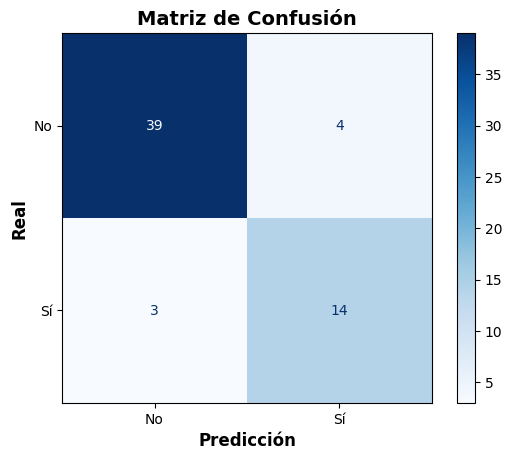

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=["No", "Sí"],
                                        cmap="Blues")
plt.title("Matriz de Confusión", fontsize=14, fontweight="bold")
plt.xlabel("Predicción", fontsize=12, fontweight="bold")
plt.ylabel("Real", fontsize=12, fontweight="bold")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.93      0.91      0.92        43
          Sí       0.78      0.82      0.80        17

    accuracy                           0.88        60
   macro avg       0.85      0.87      0.86        60
weighted avg       0.89      0.88      0.88        60



## Interpretación de las métricas

In [ ]:
def interpretacionMetricas(metricas : dict,
                           target_names : np.array,
                           class_number = 1):
    return {
        "precision": f"De todos los casos que el modelo predijo como {target_names[class_number]}, el {metricas[target_names[class_number]]['precision']*100 :.0f}% realmente eran {target_names[class_number]}",
        "recall": f"De todos los casos que fueron {target_names[class_number]} sólo el {metricas[target_names[class_number]]['recall']*100 :.0f}% fueron detectados"
    }

In [ ]:
# Obtiene las métricas
metricas_modelo = classification_report(y_test, y_pred, target_names=["No", "Sí"],
                                        output_dict=True)

# Obtiene las interpretaciones
interpretaciones_clase_positiva = interpretacionMetricas(metricas_modelo, ["No", "Sí"])
interpretaciones_clase_negativa = interpretacionMetricas(metricas_modelo, ["No", "Sí"], 0)
# Muestra las intepretaciones
print("-"*20,"\nClase positiva\n", "-"*20)
for metrica, valor in interpretaciones_clase_positiva.items():
    print(f"{metrica :<10} : {valor}")
print("-"*20,"\nClase negativa\n", "-"*20)
for metrica, valor in interpretaciones_clase_negativa.items():
    print(f"{metrica :<10} : {valor}")

-------------------- 
Clase positiva
 --------------------
precision  : De todos los casos que el modelo predijo como Sí, el 78% realmente eran Sí
recall     : De todos los casos que fueron Sí sólo el 82% fueron detectados
-------------------- 
Clase negativa
 --------------------
precision  : De todos los casos que el modelo predijo como No, el 93% realmente eran No
recall     : De todos los casos que fueron No sólo el 91% fueron detectados


## Buscando el mejor hiper parámetro

In [ ]:
# En el caso de un clasificador como DecisionTree uno de sus hiper parámetros es max_depth
param_grid = {'max_depth': np.arange(2,50)}
modelo_cv = DecisionTreeClassifier()
modelo_cv = GridSearchCV(modelo_cv, param_grid, cv=5)
modelo_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
modelo_cv.best_score_

np.float64(0.9071428571428571)

In [ ]:
modelo_cv.best_params_

{'max_depth': np.int64(23)}

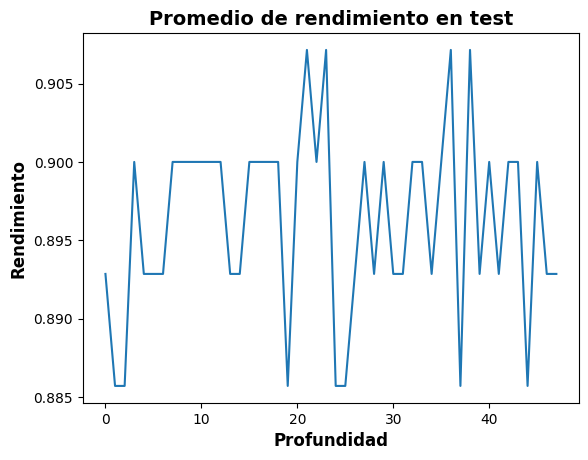

In [ ]:
plt.title("Promedio de rendimiento en test", fontsize=14, fontweight="bold")
plt.xlabel("Profundidad", fontsize=12, fontweight="bold")
plt.ylabel("Rendimiento", fontsize=12, fontweight="bold")
plt.plot(modelo_cv.cv_results_['mean_test_score']);

## Construcción del mejor modelo

In [ ]:
# Entrenar desde cero con todo el conjunto de entrenamiento y los mejores parámetros
mejores_params = modelo_cv.best_params_
modelo_final = DecisionTreeClassifier(**mejores_params)
modelo_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(23))

In [ ]:
y_pred_final = modelo_final.predict(X_test)

In [ ]:
modelo_final.get_depth()

6

In [ ]:
print(classification_report(y_test, y_pred_final, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.90      0.88      0.89        43
          Sí       0.72      0.76      0.74        17

    accuracy                           0.85        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60

